In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('./Data/power_plant_output.csv')

In [3]:
df.head(10)

,AT,V,PE
0,14.96,41.76,463.26
1,25.18,62.96,444.37
2,5.11,39.40,488.56
3,20.86,57.32,446.48
4,10.82,37.50,473.90
5,26.27,59.44,443.67
6,15.89,43.96,467.35
7,9.48,44.71,478.42
8,14.64,45.00,475.98
9,11.74,43.56,477.50


In [4]:
df.describe()

,AT,V,PE
count,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,454.365009
std,7.452473,12.707893,17.066995
min,1.810000,25.360000,420.260000
25%,13.510000,41.740000,439.750000
50%,20.345000,52.080000,451.550000
75%,25.720000,66.540000,468.430000
max,37.110000,81.560000,495.760000


In [5]:
df.isna().sum(axis = 0)

AT    0
V     0
PE    0
dtype: int64

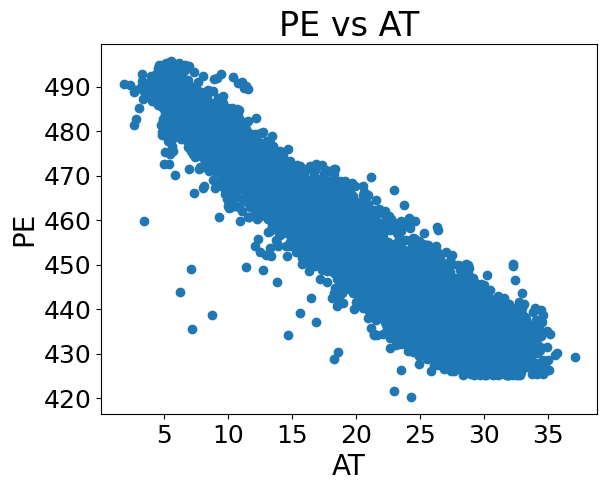

In [6]:
plt.scatter(df.AT, df.PE)
plt.title('PE vs AT', fontsize=24)
plt.xlabel('AT', fontsize=20)
plt.ylabel('PE', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

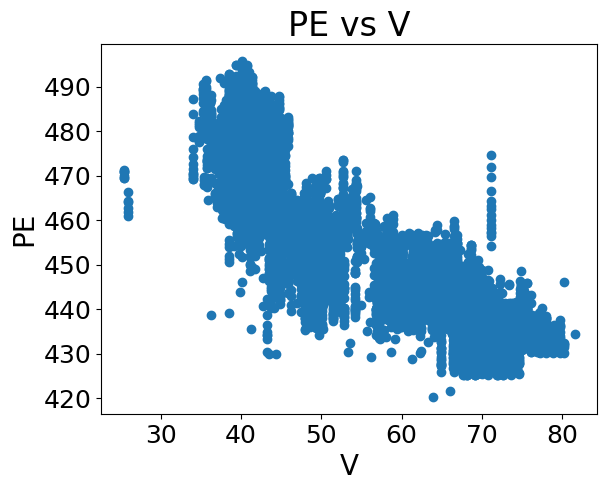

In [7]:
plt.scatter(df.V, df.PE)
plt.title('PE vs V', fontsize=24)
plt.xlabel('V', fontsize=20)
plt.ylabel('PE', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [8]:
model = smf.ols(formula='PE ~ AT + V', data=df)

In [9]:
model_result = model.fit()

In [10]:
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 5.197e+04
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:32:37   Log-Likelihood:                -28887.
No. Observations:                9568   AIC:                         5.778e+04
Df Residuals:                    9565   BIC:                         5.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    505.4774      0.240   2101.855      0.000     505.006     505.949
AT            -1.7043      0.013   -134.429      0.000      -1.729      -1.679
V             -0.3245      0.007    -43.644      0.000      -0.339      -0.310
==============================================================================
Omnibus:                      526.355   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1786.669
Skew:                          -0.198   Prob(JB):                         0.00
Kurtosis:                       5.080   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X = df.iloc[:, 0:(df.shape[-1]-1)].to_numpy()

In [12]:
X = np.c_[np.ones(X.shape[0]), X]

In [13]:
xT = np.transpose(X)

In [14]:
y = df.iloc[:, df.shape[-1]-1].to_numpy()

In [15]:
xTx_inv = np.linalg.inv(np.matmul(xT, X))

In [16]:
ols_params = np.matmul(xTx_inv, np.matmul(xT, y))

In [17]:
df_compare = pd.DataFrame({'statsmodels': model_result.params, 'explict_ols': ols_params})
df_compare

,statsmodels,explict_ols
Intercept,505.477434,505.477434
AT,-1.704266,-1.704266
V,-0.324487,-0.324487


In [19]:
df_risk = pd.read_csv('./Data/gradient_descent_example.csv')

x = df_risk['x'].to_numpy()
y = df_risk['y'].to_numpy()

In [20]:
def risk(x, y, beta):

    risk = 0.0
    for i in range(x.shape[0]):
        risk += np.power(y[i]-(beta*x[i]), 2.0)

    risk /= x.shape[0]

    return risk

def derivate_risk(x, y, beta):
    
    derivate_risk = 0.0
    for i in range(x.shape[0]):
        derivate_risk += -2.0*x[i]*(y[i]-(beta*x[i]))

    derivate_risk /= x.shape[0]

    return derivate_risk

In [21]:
eta = 0.05
n_iter = 20

beta_learn=np.full(1+n_iter, np.nan)
risk_learn=np.full(1+n_iter, np.nan)

beta_learn[0] = 1.0

for iter in range(n_iter):
    risk_learn[iter] = risk(x, y, beta_learn[iter])
    beta_learn[iter+1] = beta_learn[iter]
    beta_learn[iter+1] -= (eta*derivate_risk(x, y, beta_learn[iter]))

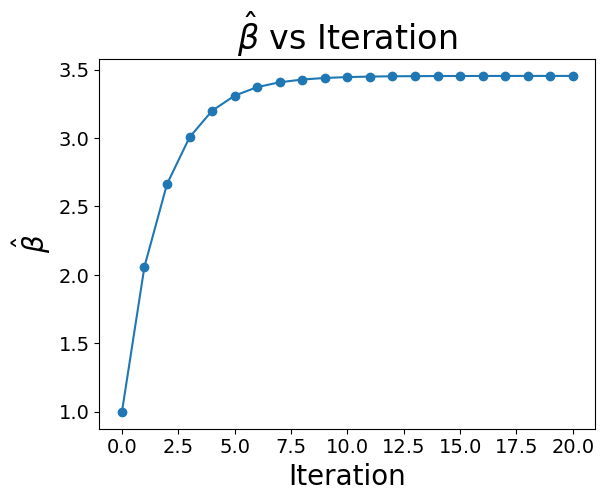

In [ ]:
plt.plot(beta_learn, marker="o")
plt.title(r'$\hat{\beta}$ vs Iteration', fontsize=24)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel(r'$\hat{\beta}$', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

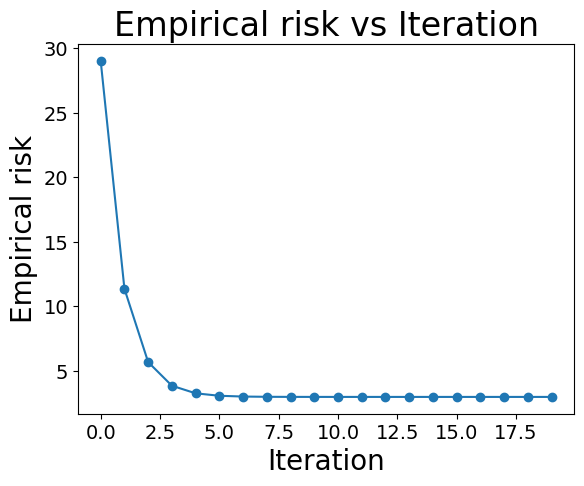

In [23]:
plt.plot(risk_learn, marker="o")
plt.title('Empirical risk vs Iteration', fontsize=24)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Empirical risk', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()